In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [2]:
df = pd.read_csv('Student_Behaviour.csv')
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

In [3]:
df.isnull().sum() #пропусков не оказалось

CertificationCourses    0
Gender                  0
Department              0
Height(CM)              0
Weight(KG)              0
10Mark                  0
12Mark                  0
CollegeMark             0
Hobbies                 0
DailyStudingTime        0
PreferToStudyIn         0
SalaryExpectation       0
LikeDegree              0
CareerBasedonDegree     0
GamesSpendingTime       0
TravellingTime          0
StressLevel             0
FinancialStatus         0
PartTimeJob?            0
dtype: int64

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

In [4]:
df['CareerBasedonDegree']=df['CareerBasedonDegree'].map(lambda x: x.replace('%', ''))
df['CareerBasedonDegree']=df['CareerBasedonDegree'].astype(float)
df['CareerBasedonDegree']=df['CareerBasedonDegree'].map(lambda x: x/100)
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,0.50,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,0.75,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,0.50,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,0.50,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,0.25,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

In [5]:
df['TravellingTime']=df['TravellingTime ']
df = df.drop(columns=['TravellingTime '])

In [6]:
zamena1={'1.30 - 2 hour': 90, '1 - 1.30 hour': 60, 'More than 2 hour': 120, '30 - 60 Minute': 30, '1 - 30 Minute': 1, '0 Minute': 0}
zamena2={'30 - 60 minutes': 30, '0 - 30 minutes': 0, '1 - 1.30 hour': 60, '2 - 2.30 hour': 120, '1.30 - 2 hour': 90, 'more than 3 hour': 180, '2.30 - 3 hour': 150}
zamena3={'0 - 30 minute': 0, '30 - 60 minute': 30, '1 - 2 Hour': 60, '2 - 3 hour': 120, '3 - 4 hour': 180, 'More Than 4 hour': 240}
df['GamesSpendingTime']=df['GamesSpendingTime'].map(lambda x: zamena1.get(x))
df['TravellingTime']=df['TravellingTime'].map(lambda x: zamena2.get(x))
df['DailyStudingTime']=df['DailyStudingTime'].map(lambda x: zamena3.get(x))
print(df.GamesSpendingTime.unique())
print(df.TravellingTime.unique())
print(df.DailyStudingTime.unique())


[ 90  60 120  30   1   0]
[ 30   0  60 120  90 180 150]
[  0  30  60 120 180 240]


**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [7]:
df.info() # для этого возьмём все количественные (float64 и int64) перменные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   DailyStudingTime      235 non-null    int64  
 10  PreferToStudyIn       235 non-null    object 
 11  SalaryExpectation     235 non-null    int64  
 12  LikeDegree            235 non-null    object 
 13  CareerBasedonDegree   235 non-null    float64
 14  GamesSpendingTime     235 non-null    int64  
 15  StressLevel           2

In [8]:
X = ['Height(CM)', 'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'DailyStudingTime', 'SalaryExpectation', 
        'CareerBasedonDegree', 'GamesSpendingTime', 'TravellingTime']

**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

<AxesSubplot:>

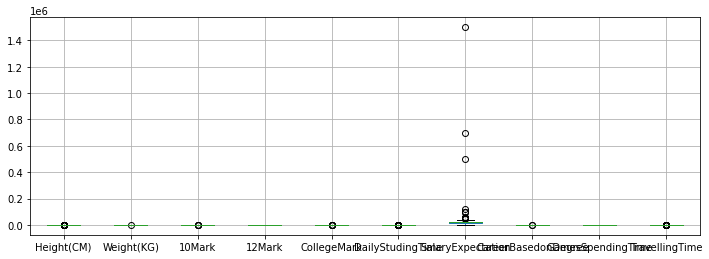

In [9]:
df[X].boxplot(figsize = (12, 4)) # как видно, выброси есть практически по каждой переменной

**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

<AxesSubplot:>

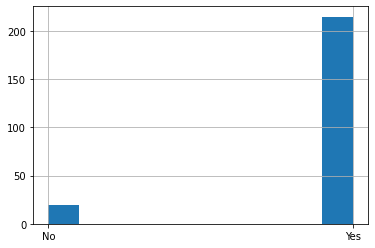

In [10]:
df['LikeDegree'].hist()

In [11]:
df['LikeDegree'].value_counts().head()

Yes    215
No      20
Name: LikeDegree, dtype: int64

Это бинарная переменная, принимающая только 2 значение (Да/Нет), которая имеет бинамиальное распределение. На графике и по функции value_counts явно видно, что дисбаланс классов присутствует и подавляющее большинство студентов отвечают "да" (больше 90%). В таком случае мы не сможем использовать в качестве классификатора класса долю верно классифицированных объектов, так как в таком случае она становиться бесполезной (принять всех за 1 класс "да" может показать такие же результаты accuracy, а может даже выше). Остальные метрики, которые мы прошли в рамках курса (точность, полнота и f-measure) использовать будет корректно.

**Задание 8.**  Переведите целевую переменную к численному формату.

In [12]:
df['LikeDegree']=df['LikeDegree'].map(lambda x: 0 if x=='No' else 1)
df.LikeDegree.unique()

array([0, 1], dtype=int64)

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [13]:
y = ['LikeDegree']

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=10, stratify=df['LikeDegree'])

**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [15]:
y_pred_naive = int(train.LikeDegree.mode().to_numpy()) * np.ones(len(test.LikeDegree))
y_pred_naive

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [16]:
X_train = train[X]
X_test = test[X]
y_train = train.LikeDegree
y_test = test.LikeDegree

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn7 = KNeighborsClassifier(n_neighbors = 7)

knn3.fit(X_train, y_train)

y_pred_knn3 = knn3.predict(X_test)
y_pred_knn3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [18]:
knn5.fit(X_train, y_train)

y_pred_knn5 = knn5.predict(X_test)
y_pred_knn5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [19]:
knn7.fit(X_train, y_train)

y_pred_knn7 = knn7.predict(X_test)
y_pred_knn7

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
precision = precision_score(y_test, y_pred_naive)
recall = recall_score(y_test, y_pred_naive)
f1 = f1_score(y_test, y_pred_naive)
print(precision, recall, f1)

0.9148936170212766 1.0 0.9555555555555556


In [22]:
precision = precision_score(y_test, y_pred_knn3)
recall = recall_score(y_test, y_pred_knn3)
f1 = f1_score(y_test, y_pred_knn3)
print(precision, recall, f1)

0.9130434782608695 0.9767441860465116 0.9438202247191011


In [23]:
precision = precision_score(y_test, y_pred_knn5)
recall = recall_score(y_test, y_pred_knn5)
f1 = f1_score(y_test, y_pred_knn5)
print(precision, recall, f1)

0.9148936170212766 1.0 0.9555555555555556


In [24]:
precision = precision_score(y_test, y_pred_knn7)
recall = recall_score(y_test, y_pred_knn7)
f1 = f1_score(y_test, y_pred_knn7)
print(precision, recall, f1)

0.9148936170212766 1.0 0.9555555555555556


Все метрики, кроме метода 3 ближайших соседей, показали одинаковые значения по каждому показателю на каждой тестовой выборке. В таком случае все они предсказывают с одинаковой точностью и победителя среди них нет. Выборка основанная на 3 ближайших соседях показала precision, recall и f-measure (то есть все метрики качества) хуже, чем в остальных (даже наивной). В таком случае победителя среди выборок нет, но есть аутсайдер.

**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test)

In [26]:
knn3.fit(X_train_norm, y_train)

y_pred_knn3_norm = knn3.predict(X_test_norm)
print(y_pred_knn3_norm)
precision = precision_score(y_test, y_pred_knn3_norm)
recall = recall_score(y_test, y_pred_knn3_norm)
f1 = f1_score(y_test, y_pred_knn3_norm)
print(precision, recall, f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


In [27]:
knn5.fit(X_train_norm, y_train)

y_pred_knn5_norm = knn5.predict(X_test_norm)
print(y_pred_knn5_norm)
precision = precision_score(y_test, y_pred_knn5_norm)
recall = recall_score(y_test, y_pred_knn5_norm)
f1 = f1_score(y_test, y_pred_knn5)
print(precision, recall, f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


In [28]:
knn7.fit(X_train_norm, y_train)

y_pred_knn7_norm = knn7.predict(X_test_norm)
print(y_pred_knn7_norm)
precision = precision_score(y_test, y_pred_knn7)
recall = recall_score(y_test, y_pred_knn7)
f1 = f1_score(y_test, y_pred_knn7)
print(precision, recall, f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


Для каждого метода (3, 5, 7 соседей) при шкалировании значения всех метрих качества никак не изменились, поэтому мы с уверенностью можем сказать, что шкалирование не помогло и в данной ситуации является бесполезным.

**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [29]:
#избавляемся от выбросов логарифмируя значения по каждой количественной перменной
train[X] = train[X].apply(lambda i: np.log(i + 1))
test[X] = test[X].apply(lambda i: np.log(i + 1))
X_train = train[X]
X_test = test[X]

In [30]:
knn3.fit(X_train, y_train)

y_pred_knn3 = knn3.predict(X_test)
print(y_pred_knn3)
precision = precision_score(y_test, y_pred_knn3)
recall = recall_score(y_test, y_pred_knn3)
f1 = f1_score(y_test, y_pred_knn3)
print(precision, recall, f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9347826086956522 1.0 0.9662921348314606


In [31]:
knn5.fit(X_train, y_train)

y_pred_knn5 = knn5.predict(X_test)
print(y_pred_knn5)
precision = precision_score(y_test, y_pred_knn5)
recall = recall_score(y_test, y_pred_knn5)
f1 = f1_score(y_test, y_pred_knn5)
print(precision, recall, f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


In [32]:
knn7.fit(X_train, y_train)

y_pred_knn7 = knn7.predict(X_test)
print(y_pred_knn7)
precision = precision_score(y_test, y_pred_knn7)
recall = recall_score(y_test, y_pred_knn7)
f1 = f1_score(y_test, y_pred_knn7)
print(precision, recall, f1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
0.9148936170212766 1.0 0.9555555555555556


**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

**Ответ**

Практически все конфигурации получили одинаковые результаты по всем метрикам. Однако нашлись 2 особенные выборки. Начальная тестовая выборка по 3 ближайшим соседям показала худшие относительно всех остальных показатели.

А тестовая выборка с очищенными выбросами методом 3 ближайших соседей показала науличшие результаты. Значение precision и ф-меры  для этой модели оказалось немного выше, чем у остальных.

precision = 0.935

recall = 1

f-measure = 0.996

В таком случае именно эта конфигурация модели получилась лучшей.